# 📊 Datathon FIAP - Passos Mágicos
## Análise Exploratória de Dados (EDA)

**Objetivo:** Realizar análise exploratória completa dos dados do PEDE (Pesquisa Extensiva do Desenvolvimento Educacional) dos anos 2022, 2023 e 2024, respondendo às 11 perguntas de negócio propostas.

**Autor:** Leandro Leme Crespo

---

## 1. Configuração do Ambiente

In [1]:
# Clonar o repositório do GitHub (executar apenas no Google Colab)
!git clone https://github.com/LeandroCrespo/datathon-passos-magicos.git
print('✅ Repositório clonado com sucesso!')

Cloning into 'datathon-passos-magicos'...


remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (304/304), done.


remote: Compressing objects: 100% (204/204), done.


remote: Total 304 (delta 182), reused 213 (delta 96), pack-reused 0 (from 0)
Receiving objects: 100% (304/304), 9.23 MiB | 20.11 MiB/s, done.


Resolving deltas: 100% (182/182), done.


✅ Repositório clonado com sucesso!


In [2]:
# Instalar bibliotecas necessárias
!pip install openpyxl plotly kaleido -q

In [3]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Cores personalizadas para as Pedras
CORES_PEDRAS = {
    'Quartzo': '#E8E8E8',
    'Ágata': '#9370DB',
    'Agata': '#9370DB',
    'Ametista': '#8B008B',
    'Topázio': '#FFD700'
}

print('✅ Bibliotecas importadas com sucesso!')

✅ Bibliotecas importadas com sucesso!


## 2. Carregamento dos Dados

In [4]:
# Carregar dados
import os
# Tentar múltiplos caminhos (Colab vs local)
caminhos_possiveis = [
    '/content/datathon-passos-magicos/data/BASE_DE_DADOS_PEDE_2024_DATATHON.xlsx',
    'data/BASE_DE_DADOS_PEDE_2024_DATATHON.xlsx',
    '../data/BASE_DE_DADOS_PEDE_2024_DATATHON.xlsx',
]
CAMINHO_ARQUIVO = None
for caminho in caminhos_possiveis:
    if os.path.exists(caminho):
        CAMINHO_ARQUIVO = caminho
        break
if CAMINHO_ARQUIVO is None:
    raise FileNotFoundError('Arquivo de dados não encontrado. Execute a célula de clone primeiro.')

xlsx = pd.ExcelFile(CAMINHO_ARQUIVO)
print(f'📁 Abas disponíveis: {xlsx.sheet_names}')

df_2022 = pd.read_excel(xlsx, sheet_name='PEDE2022')
df_2023 = pd.read_excel(xlsx, sheet_name='PEDE2023')
df_2024 = pd.read_excel(xlsx, sheet_name='PEDE2024')

print(f'\n📊 Dados carregados de: {CAMINHO_ARQUIVO}')
print(f'   PEDE 2022: {df_2022.shape[0]:,} alunos, {df_2022.shape[1]} colunas')
print(f'   PEDE 2023: {df_2023.shape[0]:,} alunos, {df_2023.shape[1]} colunas')
print(f'   PEDE 2024: {df_2024.shape[0]:,} alunos, {df_2024.shape[1]} colunas')


📁 Abas disponíveis: ['PEDE2022', 'PEDE2023', 'PEDE2024']



📊 Dados carregados de: ../data/BASE_DE_DADOS_PEDE_2024_DATATHON.xlsx
   PEDE 2022: 860 alunos, 42 colunas
   PEDE 2023: 1,014 alunos, 48 colunas
   PEDE 2024: 1,156 alunos, 50 colunas


## 3. Visão Geral dos Dados

In [5]:
def visao_geral(df, nome):
    """Exibe visão geral de um DataFrame"""
    print(f'\n{"="*60}')
    print(f'📋 {nome}')
    print(f'{"="*60}')
    print(f'\nDimensões: {df.shape[0]:,} linhas x {df.shape[1]} colunas')
    print(f'\nTipos de dados:')
    print(df.dtypes.value_counts())
    print(f'\nMemória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
    
    # Valores nulos
    nulos = df.isnull().sum()
    nulos_pct = (nulos / len(df) * 100).round(2)
    nulos_df = pd.DataFrame({'Nulos': nulos, 'Percentual (%)': nulos_pct})
    nulos_df = nulos_df[nulos_df['Nulos'] > 0].sort_values('Nulos', ascending=False)
    
    if len(nulos_df) > 0:
        print(f'\n⚠️ Colunas com valores nulos (top 10):')
        print(nulos_df.head(10))
    else:
        print(f'\n✅ Nenhum valor nulo encontrado!')
    
    return nulos_df

nulos_2022 = visao_geral(df_2022, 'PEDE 2022')
nulos_2023 = visao_geral(df_2023, 'PEDE 2023')
nulos_2024 = visao_geral(df_2024, 'PEDE 2024')


📋 PEDE 2022

Dimensões: 860 linhas x 42 colunas

Tipos de dados:
object     23
float64    10
int64       9
Name: count, dtype: int64

Memória utilizada: 1.60 MB

⚠️ Colunas com valores nulos (top 10):
            Nulos  Percentual (%)
Inglês        577           67.09
Rec Av4       564           65.58
Avaliador4    550           63.95
Pedra 20      537           62.44
Pedra 21      398           46.28
Avaliador3    326           37.91
Matem           2            0.23
Portug          2            0.23

📋 PEDE 2023

Dimensões: 1,014 linhas x 48 colunas

Tipos de dados:
float64    29
object     17
int64       2
Name: count, dtype: int64

Memória utilizada: 1.26 MB

⚠️ Colunas com valores nulos (top 10):
              Nulos  Percentual (%)
Cg             1014           100.0
Cf             1014           100.0
INDE 23        1014           100.0
Pedra 23       1014           100.0
Rec Av3        1014           100.0
Atingiu PV     1014           100.0
Indicado       1014           100.0


In [6]:
# Visualizar primeiras linhas de cada ano
print('\n📋 Primeiras linhas - PEDE 2022:')
df_2022.head(3)


📋 Primeiras linhas - PEDE 2022:


,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,...,Inglês,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,...,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,...,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ametista,...,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...


In [7]:
print('\n📋 Primeiras linhas - PEDE 2023:')
df_2023.head(3)


📋 Primeiras linhas - PEDE 2023:


,RA,Fase,INDE 2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,...,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
0,RA-861,ALFA,9.31095,Topázio,ALFA A - G0/G1,Aluno-861,6/17/2015,8,Feminino,2023,...,NaN,NaN,8.920,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
1,RA-862,ALFA,8.22120,Topázio,ALFA A - G0/G1,Aluno-862,5/31/2014,9,Masculino,2023,...,NaN,NaN,8.585,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
2,RA-863,ALFA,5.92975,Quartzo,ALFA A - G0/G1,Aluno-863,2/25/2016,7,Masculino,2023,...,NaN,NaN,6.260,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN


In [8]:
print('\n📋 Primeiras linhas - PEDE 2024:')
df_2024.head(3)


📋 Primeiras linhas - PEDE 2024:


,RA,Fase,INDE 2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,...,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1
0,RA-1275,ALFA,7.611367,Ametista,ALFA A - G0/G1,Aluno-1275,2016-07-28,8,Masculino,2024,...,5.446667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
1,RA-1276,ALFA,8.002867,Topázio,ALFA A - G0/G1,Aluno-1276,2016-10-16,8,Feminino,2024,...,7.050000,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
2,RA-1277,ALFA,7.9522,Ametista,ALFA A - G0/G1,Aluno-1277,2016-08-16,8,Masculino,2024,...,7.046667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Dom Pedro Villas Boas de Souza,Cursando,Cursando


## 4. Padronização e Limpeza dos Dados

In [9]:
# Função para padronizar nomes de colunas
def padronizar_colunas(df, ano):
    """Padroniza nomes de colunas para facilitar análise"""
    df = df.copy()
    
    # Mapeamento específico por ano para evitar duplicatas
    mapeamento = {}
    
    # Mapeamento de INDE e PEDRA específico por ano (evita duplicatas)
    if ano == '2022':
        mapeamento['INDE 22'] = 'INDE'
        mapeamento['Pedra 22'] = 'PEDRA'
    elif ano == '2023':
        mapeamento['INDE 2023'] = 'INDE'
        mapeamento['Pedra 2023'] = 'PEDRA'
    elif ano == '2024':
        mapeamento['INDE 2024'] = 'INDE'
        mapeamento['Pedra 2024'] = 'PEDRA'
    
    for col in df.columns:
        col_lower = col.lower()
        
        # Pular colunas já mapeadas
        if col in mapeamento:
            continue
        
        # IMPORTANTE: Verificar IDADE antes de IDA para evitar conflito
        if col_lower == 'idade' or col_lower.startswith('idade'):
            mapeamento[col] = 'IDADE'
        elif col_lower == 'iaa':
            mapeamento[col] = 'IAA'
        elif col_lower == 'ieg':
            mapeamento[col] = 'IEG'
        elif col_lower == 'ips':
            mapeamento[col] = 'IPS'
        elif col_lower == 'ipp':
            mapeamento[col] = 'IPP'
        elif col_lower == 'ida':
            mapeamento[col] = 'IDA'
        elif col_lower == 'ipv':
            mapeamento[col] = 'IPV'
        elif col_lower == 'ian':
            mapeamento[col] = 'IAN'
        elif 'defas' in col_lower:
            mapeamento[col] = 'DEFASAGEM'
        elif col_lower == 'fase':
            mapeamento[col] = 'FASE'
        elif 'fase ideal' in col_lower:
            mapeamento[col] = 'FASE_IDEAL'
        elif 'atingiu pv' in col_lower or 'ponto_virada' in col_lower:
            mapeamento[col] = 'PONTO_VIRADA'
        elif col_lower == 'gênero' or col_lower == 'genero':
            mapeamento[col] = 'GENERO'
        elif 'ano ingresso' in col_lower or 'ano_ingresso' in col_lower:
            mapeamento[col] = 'ANO_INGRESSO'
        elif col_lower == 'ra':
            mapeamento[col] = 'RA'
    
    # Aplicar mapeamento
    df = df.rename(columns=mapeamento)
    
    # Remover colunas duplicadas (manter apenas a primeira)
    df = df.loc[:, ~df.columns.duplicated()]
    
    # Adicionar coluna de ano
    df['ANO'] = int(ano)
    
    return df

# Aplicar padronização
df_2022_pad = padronizar_colunas(df_2022, '2022')
df_2023_pad = padronizar_colunas(df_2023, '2023')
df_2024_pad = padronizar_colunas(df_2024, '2024')

print('✅ Colunas padronizadas!')
print(f'\nColunas 2022: {list(df_2022_pad.columns)[:15]}...')
print(f'Colunas 2023: {list(df_2023_pad.columns)[:15]}...')
print(f'Colunas 2024: {list(df_2024_pad.columns)[:15]}...')

✅ Colunas padronizadas!

Colunas 2022: ['RA', 'FASE', 'Turma', 'Nome', 'Ano nasc', 'IDADE', 'GENERO', 'ANO_INGRESSO', 'Instituição de ensino', 'Pedra 20', 'Pedra 21', 'PEDRA', 'INDE', 'Cg', 'Cf']...
Colunas 2023: ['RA', 'FASE', 'INDE', 'PEDRA', 'Turma', 'Nome Anonimizado', 'Data de Nasc', 'IDADE', 'GENERO', 'ANO_INGRESSO', 'Instituição de ensino', 'Pedra 20', 'Pedra 21', 'Pedra 22', 'Pedra 23']...
Colunas 2024: ['RA', 'FASE', 'INDE', 'PEDRA', 'Turma', 'Nome Anonimizado', 'Data de Nasc', 'IDADE', 'GENERO', 'ANO_INGRESSO', 'Instituição de ensino', 'Pedra 20', 'Pedra 21', 'Pedra 22', 'Pedra 23']...


In [10]:
# Selecionar colunas principais para análise unificada
colunas_principais = ['RA', 'ANO', 'FASE', 'PEDRA', 'INDE', 'IAA', 'IEG', 'IPS', 'IPP', 'IDA', 'IPV', 'IAN', 'DEFASAGEM', 'GENERO', 'IDADE', 'ANO_INGRESSO', 'PONTO_VIRADA']

def selecionar_colunas(df, colunas):
    """Seleciona apenas colunas existentes no DataFrame"""
    colunas_existentes = [c for c in colunas if c in df.columns]
    return df[colunas_existentes].copy()

df_2022_sel = selecionar_colunas(df_2022_pad, colunas_principais)
df_2023_sel = selecionar_colunas(df_2023_pad, colunas_principais)
df_2024_sel = selecionar_colunas(df_2024_pad, colunas_principais)

print('Colunas selecionadas por ano:')
print(f'2022: {list(df_2022_sel.columns)}')
print(f'2023: {list(df_2023_sel.columns)}')
print(f'2024: {list(df_2024_sel.columns)}')

Colunas selecionadas por ano:
2022: ['RA', 'ANO', 'FASE', 'PEDRA', 'INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IAN', 'DEFASAGEM', 'GENERO', 'IDADE', 'ANO_INGRESSO', 'PONTO_VIRADA']
2023: ['RA', 'ANO', 'FASE', 'PEDRA', 'INDE', 'IAA', 'IEG', 'IPS', 'IPP', 'IDA', 'IPV', 'IAN', 'DEFASAGEM', 'GENERO', 'IDADE', 'ANO_INGRESSO', 'PONTO_VIRADA']
2024: ['RA', 'ANO', 'FASE', 'PEDRA', 'INDE', 'IAA', 'IEG', 'IPS', 'IPP', 'IDA', 'IPV', 'IAN', 'DEFASAGEM', 'GENERO', 'IDADE', 'ANO_INGRESSO', 'PONTO_VIRADA']


In [11]:
# Criar DataFrame unificado para análises comparativas
df_unificado = pd.concat([df_2022_sel, df_2023_sel, df_2024_sel], ignore_index=True)

# Padronizar valores de PEDRA
df_unificado['PEDRA'] = df_unificado['PEDRA'].replace({'Agata': 'Ágata'})

# Converter colunas de indicadores para numérico (corrige erro de tipos)
colunas_numericas = ['INDE', 'IAA', 'IEG', 'IPS', 'IPP', 'IDA', 'IPV', 'IAN', 'DEFASAGEM', 'IDADE']
for col in colunas_numericas:
    if col in df_unificado.columns:
        df_unificado[col] = pd.to_numeric(df_unificado[col], errors='coerce')

print(f'\n📊 DataFrame Unificado:')
print(f'   Total de registros: {len(df_unificado):,}')
print(f'   Colunas: {list(df_unificado.columns)}')
print(f'\nDistribuição por ano:')
print(df_unificado['ANO'].value_counts().sort_index())


📊 DataFrame Unificado:
   Total de registros: 3,030
   Colunas: ['RA', 'ANO', 'FASE', 'PEDRA', 'INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPV', 'IAN', 'DEFASAGEM', 'GENERO', 'IDADE', 'ANO_INGRESSO', 'PONTO_VIRADA', 'IPP']

Distribuição por ano:
ANO
2022     860
2023    1014
2024    1156
Name: count, dtype: int64


## 5. Análise dos Indicadores

### 5.1 Estatísticas Descritivas dos Indicadores

In [12]:
# Indicadores para análise
indicadores = ['INDE', 'IAA', 'IEG', 'IPS', 'IPP', 'IDA', 'IPV', 'IAN']

# Estatísticas por ano
stats_por_ano = df_unificado.groupby('ANO')[indicadores].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
print('📊 Estatísticas dos Indicadores por Ano:')
stats_por_ano

📊 Estatísticas dos Indicadores por Ano:


INDE                                                     IAA         \
          mean    median       std       min       max count      mean median   
ANO                                                                             
2022  7.036176  7.197000  1.017773  3.032000  9.442000   860  8.274419  8.800   
2023  7.342309  7.408033  0.901757  3.745542  9.371200   931  6.903049  8.500   
2024  7.396686  7.540041  1.013915  3.789478  9.531325  1054  8.543563  8.751   

                     ...       IPV                              IAN         \
           std  min  ...       std       min    max count      mean median   
ANO                  ...                                                     
2022  2.064935  0.0  ...  1.093383  2.500000  10.00   860  6.424419    5.0   
2023  3.590414  0.0  ...  0.945427  3.320000  10.01   938  7.243590    5.0   
2024  1.491450  0.0  ...  1.048541  2.943333   9.76  1054  7.683824   10.0   

                                 
           std  min   max count  
ANO                              
2022  2.389609  2.5  10.0   860  
2023  2.539585  2.5  10.0  1014  
2024  2.504055  2.5  10.0  1156  

[3 rows x 48 columns]

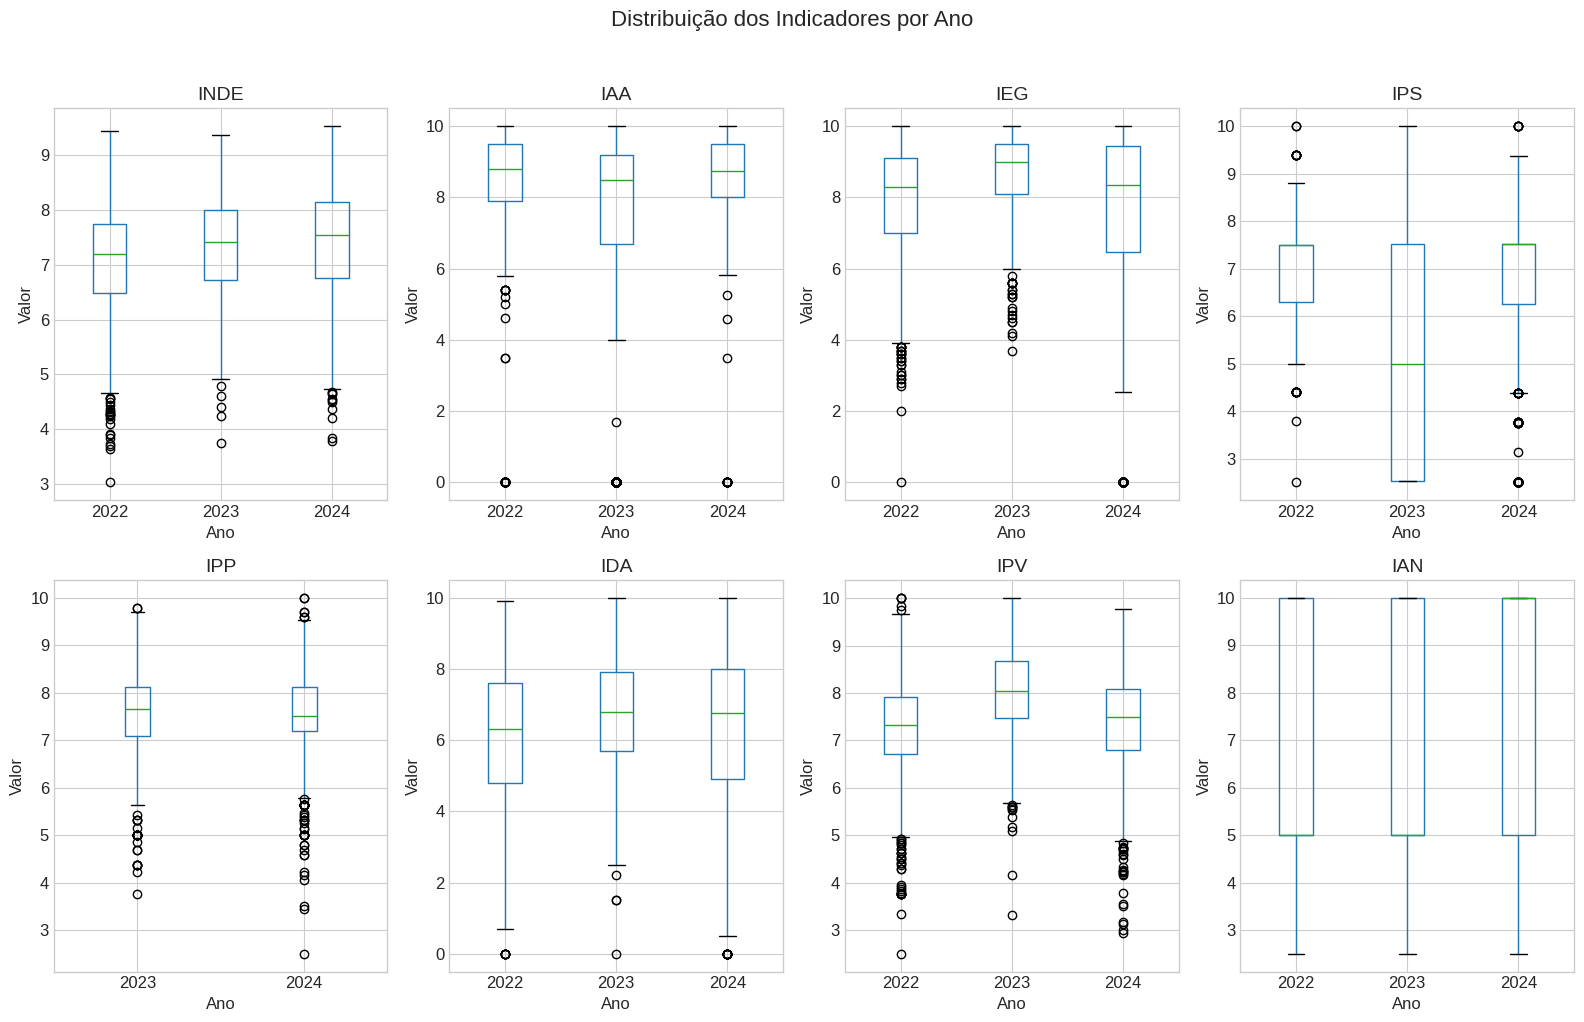

In [13]:
# Visualização da evolução dos indicadores ao longo dos anos
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

for i, ind in enumerate(indicadores):
    ax = axes[i]
    
    # Boxplot por ano
    df_plot = df_unificado[['ANO', ind]].dropna()
    df_plot.boxplot(column=ind, by='ANO', ax=ax)
    
    ax.set_title(f'{ind}')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Valor')

plt.suptitle('Distribuição dos Indicadores por Ano', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('indicadores_por_ano.png', dpi=150, bbox_inches='tight')
plt.show()

In [14]:
# Evolução das médias dos indicadores
medias_por_ano = df_unificado.groupby('ANO')[indicadores].mean()

fig = go.Figure()

for ind in indicadores:
    fig.add_trace(go.Scatter(
        x=medias_por_ano.index,
        y=medias_por_ano[ind],
        mode='lines+markers',
        name=ind,
        line=dict(width=3),
        marker=dict(size=10)
    ))

fig.update_layout(
    title='Evolução das Médias dos Indicadores (2022-2024)',
    xaxis_title='Ano',
    yaxis_title='Média',
    legend_title='Indicador',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()

### 5.2 Distribuição das Pedras (Classificação INDE)

In [15]:
# Distribuição das Pedras por ano
pedras_por_ano = df_unificado.groupby(['ANO', 'PEDRA']).size().unstack(fill_value=0)

# Ordenar pedras
ordem_pedras = ['Quartzo', 'Ágata', 'Ametista', 'Topázio']
pedras_existentes = [p for p in ordem_pedras if p in pedras_por_ano.columns]
pedras_por_ano = pedras_por_ano[pedras_existentes]

print('📊 Distribuição das Pedras por Ano:')
print(pedras_por_ano)
print('\nPercentual:')
print((pedras_por_ano.div(pedras_por_ano.sum(axis=1), axis=0) * 100).round(2))

📊 Distribuição das Pedras por Ano:
PEDRA  Quartzo  Ágata  Ametista  Topázio
ANO                                     
2022       132    250       348      130
2023        72    246       381      232
2024       112    225       391      326

Percentual:
PEDRA  Quartzo  Ágata  Ametista  Topázio
ANO                                     
2022     15.35  29.07     40.47    15.12
2023      7.73  26.42     40.92    24.92
2024     10.63  21.35     37.10    30.93


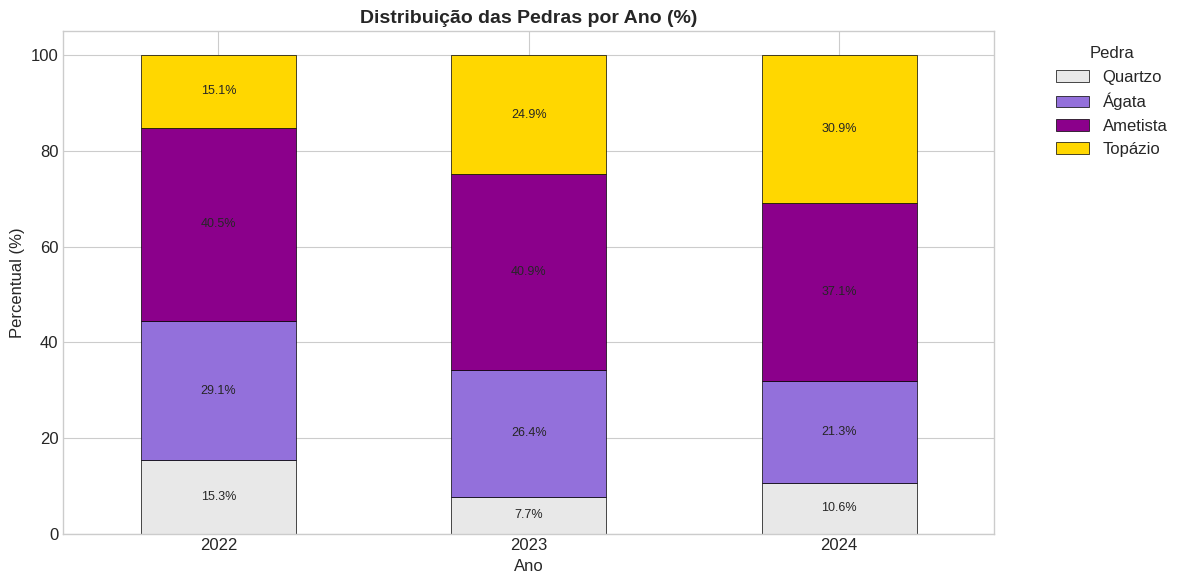

In [16]:
# Gráfico de barras empilhadas - Distribuição das Pedras
fig, ax = plt.subplots(figsize=(12, 6))

# Calcular percentuais
pedras_pct = pedras_por_ano.div(pedras_por_ano.sum(axis=1), axis=0) * 100

# Cores das pedras
cores = [CORES_PEDRAS.get(p, '#808080') for p in pedras_existentes]

pedras_pct.plot(kind='bar', stacked=True, ax=ax, color=cores, edgecolor='black', linewidth=0.5)

ax.set_title('Distribuição das Pedras por Ano (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Percentual (%)', fontsize=12)
ax.legend(title='Pedra', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adicionar valores nas barras
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center', fontsize=9)

plt.tight_layout()
plt.savefig('distribuicao_pedras.png', dpi=150, bbox_inches='tight')
plt.show()

### 5.3 Análise da Defasagem (IAN)

In [17]:
# Distribuição da defasagem por ano
defasagem_por_ano = df_unificado.groupby(['ANO', 'DEFASAGEM']).size().unstack(fill_value=0)

print('📊 Distribuição da Defasagem por Ano:')
print(defasagem_por_ano)

# Estatísticas da defasagem
print('\n📈 Estatísticas da Defasagem por Ano:')
print(df_unificado.groupby('ANO')['DEFASAGEM'].agg(['mean', 'median', 'std', 'min', 'max']))

📊 Distribuição da Defasagem por Ano:
DEFASAGEM  -5  -4  -3   -2   -1    0    1   2   3
ANO                                              
2022        1   4  23  163  410  247    9   3   0
2023        0   1  13  130  408  420   37   5   0
2024        0   0   3   90  441  485  119  16   2

📈 Estatísticas da Defasagem por Ano:
          mean  median       std  min  max
ANO                                       
2022 -0.943023    -1.0  0.845593   -5    2
2023 -0.654832    -1.0  0.821233   -4    2
2024 -0.409170     0.0  0.850497   -3    3


In [18]:
# Classificar defasagem em categorias
def classificar_defasagem(valor):
    if pd.isna(valor):
        return 'Não informado'
    elif valor <= -3:
        return 'Severamente defasado'
    elif valor <= -1:
        return 'Moderadamente defasado'
    elif valor == 0:
        return 'Adequado ao nível'
    else:
        return 'Acima do nível'

df_unificado['CATEGORIA_DEFASAGEM'] = df_unificado['DEFASAGEM'].apply(classificar_defasagem)

# Distribuição por categoria
cat_defasagem = df_unificado.groupby(['ANO', 'CATEGORIA_DEFASAGEM']).size().unstack(fill_value=0)

# Ordenar categorias
ordem_cat = ['Severamente defasado', 'Moderadamente defasado', 'Adequado ao nível', 'Acima do nível']
cat_existentes = [c for c in ordem_cat if c in cat_defasagem.columns]
cat_defasagem = cat_defasagem[cat_existentes]

print('📊 Distribuição por Categoria de Defasagem:')
print(cat_defasagem)
print('\nPercentual:')
print((cat_defasagem.div(cat_defasagem.sum(axis=1), axis=0) * 100).round(2))

📊 Distribuição por Categoria de Defasagem:
CATEGORIA_DEFASAGEM  Severamente defasado  Moderadamente defasado  \
ANO                                                                 
2022                                   28                     573   
2023                                   14                     538   
2024                                    3                     531   

CATEGORIA_DEFASAGEM  Adequado ao nível  Acima do nível  
ANO                                                     
2022                               247              12  
2023                               420              42  
2024                               485             137  

Percentual:
CATEGORIA_DEFASAGEM  Severamente defasado  Moderadamente defasado  \
ANO                                                                 
2022                                 3.26                   66.63   
2023                                 1.38                   53.06   
2024                                 

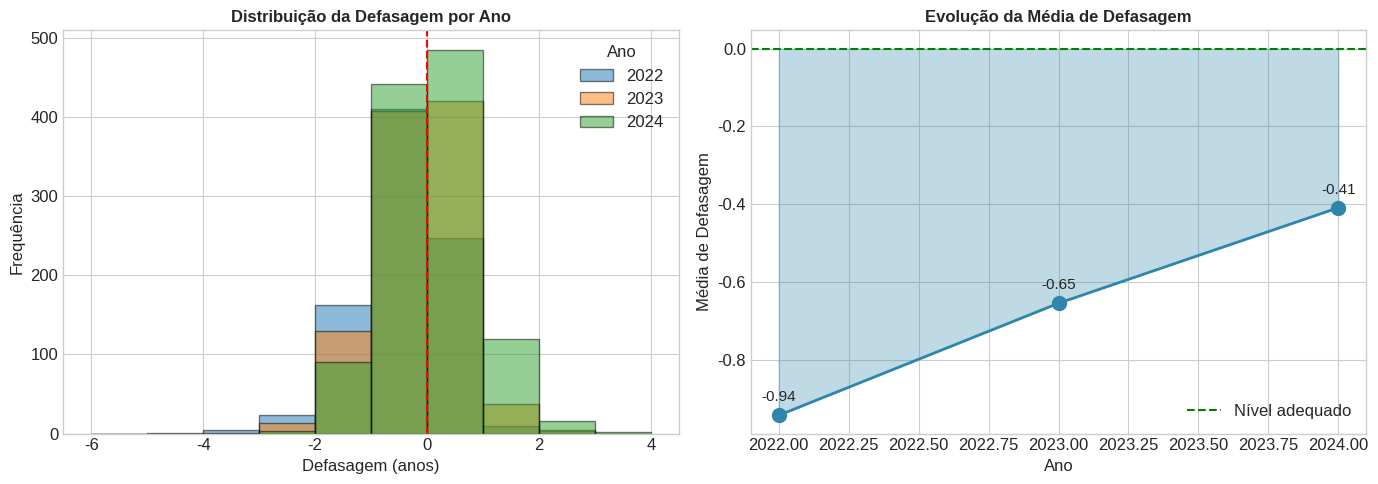

In [19]:
# Visualização da evolução da defasagem
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Histograma da defasagem por ano
ax1 = axes[0]
for ano in [2022, 2023, 2024]:
    dados = df_unificado[df_unificado['ANO'] == ano]['DEFASAGEM'].dropna()
    ax1.hist(dados, bins=range(-6, 5), alpha=0.5, label=str(ano), edgecolor='black')

ax1.set_title('Distribuição da Defasagem por Ano', fontsize=12, fontweight='bold')
ax1.set_xlabel('Defasagem (anos)')
ax1.set_ylabel('Frequência')
ax1.legend(title='Ano')
ax1.axvline(x=0, color='red', linestyle='--', label='Nível adequado')

# Gráfico 2: Evolução da média de defasagem
ax2 = axes[1]
media_defasagem = df_unificado.groupby('ANO')['DEFASAGEM'].mean()
ax2.plot(media_defasagem.index, media_defasagem.values, marker='o', linewidth=2, markersize=10, color='#2E86AB')
ax2.fill_between(media_defasagem.index, media_defasagem.values, alpha=0.3, color='#2E86AB')

ax2.set_title('Evolução da Média de Defasagem', fontsize=12, fontweight='bold')
ax2.set_xlabel('Ano')
ax2.set_ylabel('Média de Defasagem')
ax2.axhline(y=0, color='green', linestyle='--', label='Nível adequado')
ax2.legend()

# Adicionar valores nos pontos
for x, y in zip(media_defasagem.index, media_defasagem.values):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords='offset points', xytext=(0, 10), ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('evolucao_defasagem.png', dpi=150, bbox_inches='tight')
plt.show()

### 5.4 Matriz de Correlação dos Indicadores

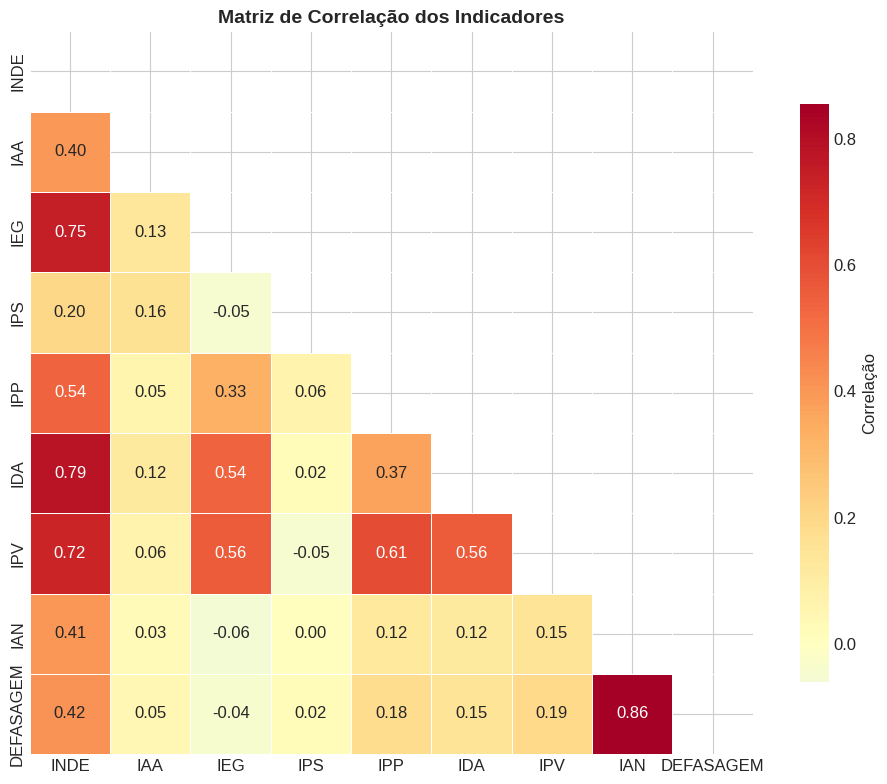


📊 Correlações mais fortes com INDE:
IDA          0.785311
IEG          0.745330
IPV          0.720896
IPP          0.540295
DEFASAGEM    0.415384
IAN          0.405309
IAA          0.397226
IPS          0.199618
Name: INDE, dtype: float64


In [20]:
# Calcular matriz de correlação
indicadores_corr = ['INDE', 'IAA', 'IEG', 'IPS', 'IPP', 'IDA', 'IPV', 'IAN', 'DEFASAGEM']
indicadores_existentes = [i for i in indicadores_corr if i in df_unificado.columns]

corr_matrix = df_unificado[indicadores_existentes].corr()

# Heatmap de correlação
fig, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlBu_r', 
            center=0, square=True, linewidths=0.5, ax=ax,
            cbar_kws={'shrink': 0.8, 'label': 'Correlação'})

ax.set_title('Matriz de Correlação dos Indicadores', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('matriz_correlacao.png', dpi=150, bbox_inches='tight')
plt.show()

print('\n📊 Correlações mais fortes com INDE:')
corr_inde = corr_matrix['INDE'].drop('INDE').sort_values(ascending=False)
print(corr_inde)

## 6. Análise por Fase do Programa

In [21]:
# Distribuição dos alunos por fase
print('📊 Distribuição por Fase (2022):')
print(df_2022['Fase'].value_counts().sort_index())

print('\n📊 Distribuição por Fase (2023):')
print(df_2023['Fase'].value_counts())

print('\n📊 Distribuição por Fase (2024):')
print(df_2024['Fase'].value_counts().head(15))

📊 Distribuição por Fase (2022):
Fase
0    190
1    192
2    155
3    148
4     76
5     60
6     18
7     21
Name: count, dtype: int64

📊 Distribuição por Fase (2023):
Fase
ALFA      231
FASE 2    200
FASE 1    173
FASE 3    132
FASE 4     94
FASE 5     65
FASE 8     63
FASE 6     33
FASE 7     23
Name: count, dtype: int64

📊 Distribuição por Fase (2024):
Fase
ALFA    196
9        38
7E       25
8E       23
4M       18
4B       17
2L       16
1G       16
3D       16
3U       16
4F       16
2M       16
3K       16
2K       16
3B       16
Name: count, dtype: int64


In [22]:
# Análise de indicadores por Pedra
indicadores_analise = ['INDE', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP', 'IPV', 'IAN']

# Médias por Pedra
medias_por_pedra = df_unificado.groupby('PEDRA')[indicadores_analise].mean()

# Ordenar por INDE
ordem_pedras = ['Quartzo', 'Ágata', 'Ametista', 'Topázio']
medias_por_pedra = medias_por_pedra.reindex([p for p in ordem_pedras if p in medias_por_pedra.index])

print('📊 Médias dos Indicadores por Pedra:')
medias_por_pedra.round(2)

📊 Médias dos Indicadores por Pedra:


,INDE,IDA,IEG,IAA,IPS,IPP,IPV,IAN
PEDRA,,,,,,,,
Quartzo,5.37,3.46,5.61,5.76,5.79,6.55,6.06,5.66
Ágata,6.59,5.26,7.59,7.23,5.99,7.19,7.03,6.08
Ametista,7.52,6.81,8.68,8.31,6.31,7.60,7.74,7.00
Topázio,8.44,8.18,9.38,9.02,6.84,8.13,8.46,8.62


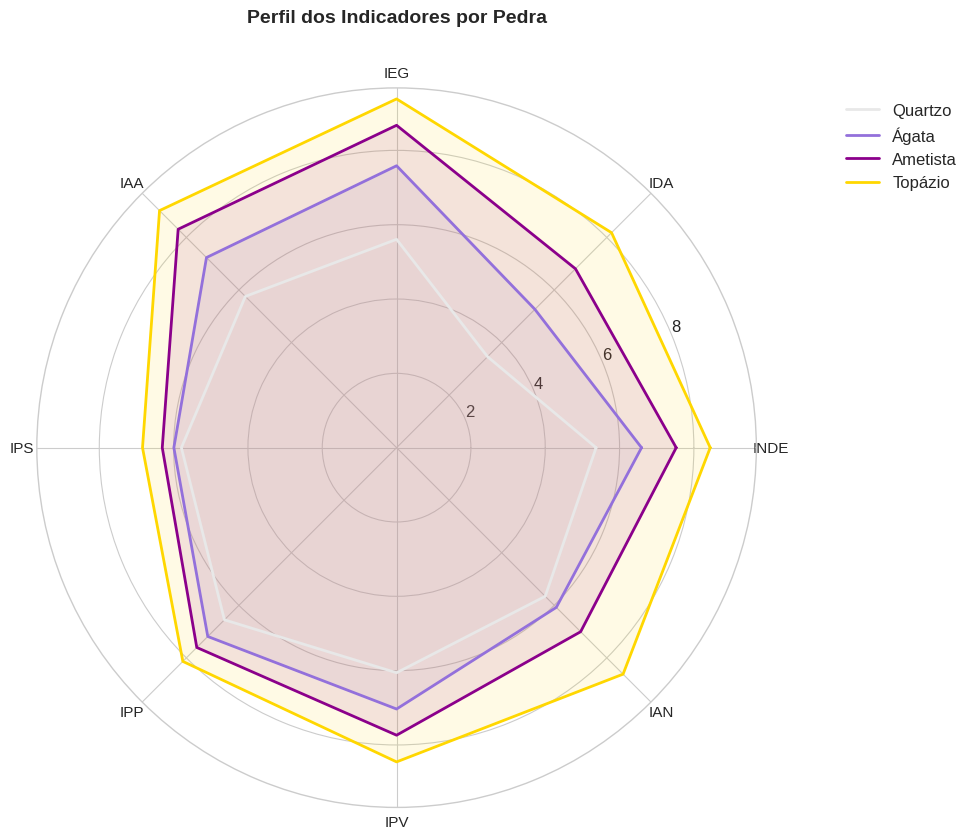

In [23]:
# Visualização radar dos indicadores por Pedra
from math import pi

# Preparar dados para radar
categorias = indicadores_analise
N = len(categorias)

# Criar ângulos
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for pedra in medias_por_pedra.index:
    valores = medias_por_pedra.loc[pedra].values.tolist()
    valores += valores[:1]
    
    ax.plot(angles, valores, linewidth=2, linestyle='solid', label=pedra, 
            color=CORES_PEDRAS.get(pedra, '#808080'))
    ax.fill(angles, valores, alpha=0.1, color=CORES_PEDRAS.get(pedra, '#808080'))

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categorias, fontsize=11)
ax.set_title('Perfil dos Indicadores por Pedra', fontsize=14, fontweight='bold', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.savefig('radar_indicadores_pedra.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. Salvando Dados Processados

In [24]:
# Salvar DataFrame unificado para uso posterior
df_unificado.to_csv('dados_unificados_passos_magicos.csv', index=False)
print('✅ Dados salvos em: dados_unificados_passos_magicos.csv')

# Resumo final
print(f'\n📊 Resumo do Dataset Unificado:')
print(f'   Total de registros: {len(df_unificado):,}')
print(f'   Período: 2022 a 2024')
print(f'   Colunas: {len(df_unificado.columns)}')
print(f'\n   Distribuição por ano:')
print(df_unificado['ANO'].value_counts().sort_index())

✅ Dados salvos em: dados_unificados_passos_magicos.csv

📊 Resumo do Dataset Unificado:
   Total de registros: 3,030
   Período: 2022 a 2024
   Colunas: 18

   Distribuição por ano:
ANO
2022     860
2023    1014
2024    1156
Name: count, dtype: int64


---

## 📝 Próximos Passos

1. **Notebook 2:** Responder às 11 perguntas de negócio com análises detalhadas
2. **Notebook 3:** Desenvolver modelo preditivo de risco de defasagem
3. **Streamlit:** Criar aplicação para deploy do modelo

---